In [1]:
!pip install keras
!pip install msgpack
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://ec2-54-197-2-252.compute-1.amazonaws.com
You are using pip version 18.1, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://ec2-54-197-2-252.compute-1.amazonaws.com
You are using pip version 18.1, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://ec2-54-197-2-252.compute-1.amazonaws.com
You are using pip version 18.1, however version 20.1b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
# The above function will install the above pip packages 
# which are required to run this program.

In [53]:
##Updated to Keras 2.0
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model

In [41]:
# In this block, we are installing all necessary libraries that are 
# required to run CNN program. 
# This is using Tenserlow backend. 
# We are also printing the number/length of our data(cats and dogs images) 
# with the above print command

In [42]:
# classifier=Sequential()
# # The above classifier is set to Sequential(), Sequentitial model is a linear stack of layers
# classifier.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
# #Here we are doing Binary Classification 
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Conv2D(32,(3,3),activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# classifier.add(Conv2D(32,(3,3),activation = 'relu'))
# classifier.add(Conv2D(64,(3,3),activation = 'relu'))
# # classifier.add(Conv2D(32,(3,3),activation = 'relu'))
# classifier.add(Flatten())
# classifier.add(Dense(units=64,activation='relu'))
# classifier.add(Dense(units=1,activation='sigmoid'))
# classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './cats_dogs_images/training'
validation_data_dir = './cats_dogs_images/test'

In [54]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [55]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [66]:
epochs = 10
train_samples = 1600
validation_samples = 400

In [67]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)
#About 60 seconds an epoch when using CPU

Epoch 1/10


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [69]:
model.save_weights('./basic_cnn_30_epochs.h5')

In [47]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [26]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('./cats_dogs_images/training',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# test_set = test_datagen.flow_from_directory('./cats_dogs_images/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [51]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [27]:
# In the above block, we have some training test data.
# Here we are rescaling the images and making sure they are all same size   
# Also, In training_set and test_set - we are grabbing the training and test data 
# from the local directory and assigning the target_size,
# batch_size and class_mode to binary as its a binary classification.

In [29]:
start = time.time()
history = classifier.fit_generator(training_set,
                   samples_per_epoch=2000,
                   nb_epoch=50,
                   validation_data=test_set,
                   nb_val_samples=800)
end = time.time()
print('Processing Time ', round(end - start,2))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


Epoch 1/50


/Users/somgarg/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/somgarg/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=62, epochs=50, validation_steps=800)`
  


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [14]:
# Here we are creating a classfier fit_generator. 
#  history = classifier.fit_generator(training_set,
                   samples_per_epoch=800,
                   nb_epoch=15,
                   validation_data=test_set,
                   nb_val_samples=100)
# keras.fit_generator() in Python is a deep learning 
# library which can be used to train our machine learning and deep learning models.  
# In this classifier we are giving few arguments like 
# 1) training_set - the Keras Object model.
# 2) samples_per_epoch - integer, number of samples to process before going to the next epoch.
# 3) nb_epoch - integer, total number of iterations on the data.
# 4) validation_data: this can be either a generator for the validation data
# 5) nb_val_samples: only relevant if validation_data is a generator. 
# Number of samples to use from validation generator at the end of every epoch.

In [5]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)         

In [8]:
img1 = image.load_img('./cats_dogs_images/test/cats/cat.865.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1)
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [22]:
test_set.reset
ytesthat = classifier.predict_generator(test_set, steps=13)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [23]:
x1 = classifier.evaluate_generator(training_set, steps=1)
x2 = classifier.evaluate_generator(test_set, steps=1)
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 65.62%     Training loss  : 0.709067
Validation Accuracy: 59.38%     Validation loss: 0.772690


In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.tail(10)

,filename,predict,y,y_pred
390,dogs\dog.990.jpg,0.69517,1,1
391,dogs\dog.991.jpg,0.91758,1,1
392,dogs\dog.992.jpg,0.53322,1,1
393,dogs\dog.993.jpg,0.69461,1,1
394,dogs\dog.994.jpg,0.73289,1,1
395,dogs\dog.995.jpg,0.64306,1,1
396,dogs\dog.996.jpg,0.76848,1,1
397,dogs\dog.997.jpg,0.63331,1,1
398,dogs\dog.998.jpg,0.68462,1,1
399,dogs\dog.999.jpg,0.93816,1,1


In [25]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 400 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 400 Validation images : 186


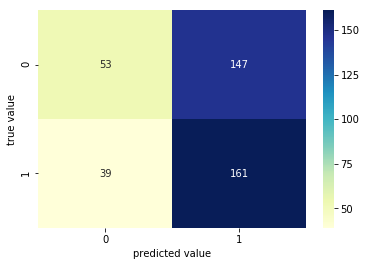

In [26]:
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

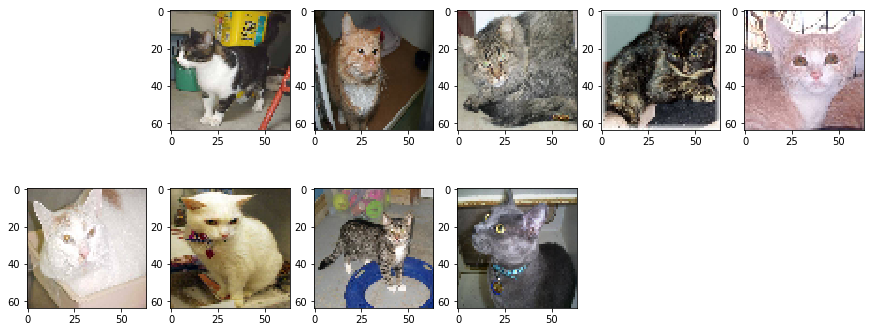

In [27]:
CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 6
rows = 1
for i in range(1,10):
    img = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/test/'+ CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows+1, columns, i+1)
    plt.imshow(img)
plt.show()

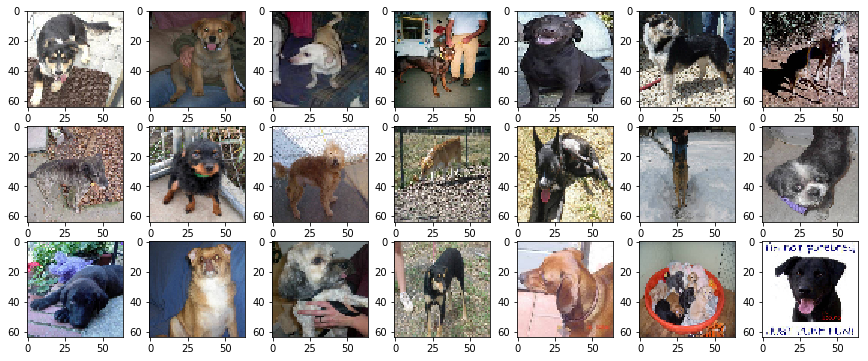

In [28]:
DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    img = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

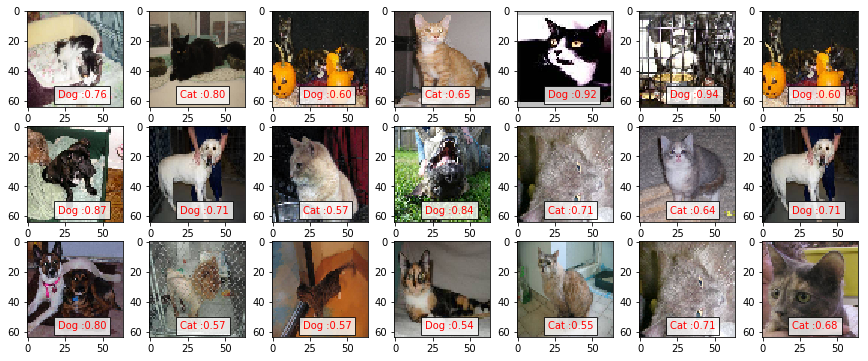

In [29]:
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
files = os.listdir('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/tester/')
for i in range(columns*rows):
    index = random.randrange(0, len(files))
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('/Users/Sean/Desktop/Week 7_Assignment/cats_dogs_images/tester/'+ files[index], 
                          target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1)
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)